##### Import zipfile and os librarie

In [2]:
from zipfile import ZipFile
import os

zip_file_path = r"C:\Users\thars\Downloads\women-fashion.zip"
extraction_directory = r"C:\Users\thars\Downloads\women_fashion"

if not os.path.exists (zip_file_path):
    os.makedirs(extraction_directory)

#extract files into women-fashion directory
with ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

['women fashion', '__MACOSX']


In [3]:
# Correcting the path to include the women fashion direcotory and listing it's content 
extraction_directory_updated = os.path.join(extraction_directory, "women fashion")

# list the files in the updated directory
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10] , len(extracted_files_updated)

(['.DS_Store',
  'anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg',
  'Anarkali suit with a modern twist.jpg',
  'Anarkali suit with fitted bodice with a high neckline.jpg',
  'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg',
  'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg',
  'anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg',
  'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg',
  'beige top adorned with black dots and a green skirt.jpg',
  'black and white gingham checkered A-line dress with a flared skirt.jpg'],
 97)

##### Import Necessary libraries

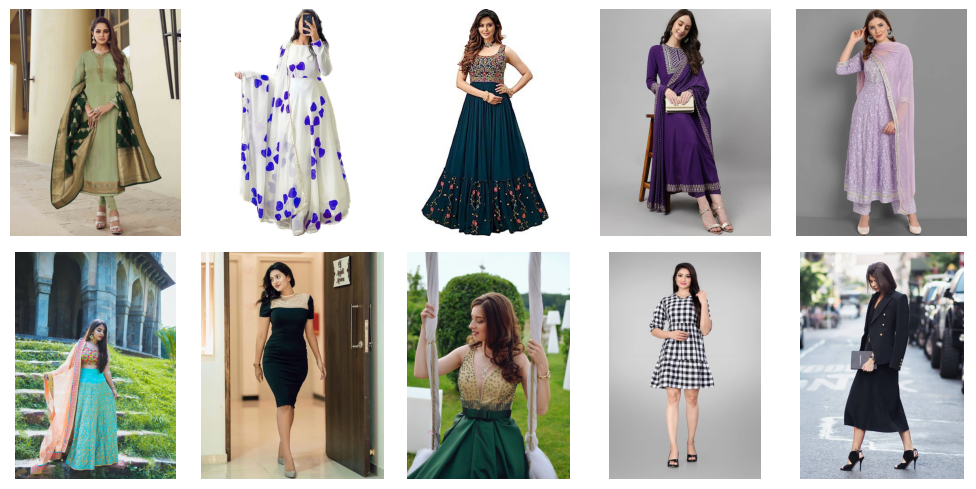

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

# function to load and display the image
def display_images(file_paths):
    plt.figure(figsize=(10, 5))  
    for i, file_path in enumerate(file_paths):
        plt.subplot(2, 5, i + 1) 
        image = Image.open(file_path)
        plt.imshow(image)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Display the first image to show it's characteristics
file_image_paths = [os.path.join(extraction_directory_updated, extracted_files_updated[i + 1]) for i in range(10)]

# Display the first 10 images
display_images(file_image_paths)

In [6]:
# Now, we will create a list of all image file paths that will be used later 
# in extracting the features from every image in the dataset:
# directory that containing my images
import glob

# dictory containing my images
image_directory = r"C:\Users\thars\Downloads\women_fashion\women fashion"

image_path_list = [file for file in glob.glob(os.path.join(image_directory, "*.*")) if file.endswith((".jpg", ".jpeg", ".png", "webp"))]

# display all images in the image path file
print(image_path_list)

['C:\\Users\\thars\\Downloads\\women_fashion\\women fashion\\anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg', 'C:\\Users\\thars\\Downloads\\women_fashion\\women fashion\\Anarkali suit with a modern twist.jpg', 'C:\\Users\\thars\\Downloads\\women_fashion\\women fashion\\Anarkali suit with fitted bodice with a high neckline.jpg', 'C:\\Users\\thars\\Downloads\\women_fashion\\women fashion\\anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', 'C:\\Users\\thars\\Downloads\\women_fashion\\women fashion\\anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', 'C:\\Users\\thars\\Downloads\\women_fashion\\women fashion\\anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg', 'C:\\Users\\thars\\Downloads\\women_fa

In [7]:
# Next we wiil extract features from all the fashion images
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_path_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [8]:
from scipy.spatial.distance import cosine

def recommend_fashoin_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract the features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calulate the similarity and find the top N similiar image
    similarities = [1 - cosine(input_features, other_features) for other_features in all_features]
    similiar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from the similiar_indices
    similiar_indices = [idx for idx in similiar_indices if idx != all_image_names.index(input_image_path)]

    # display the input image 
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("input image")
    plt.axis("off")

    # display similiar image
    for i, idx in enumerate(similiar_indices[:top_n], start=1):
        image_path = os.path.join(r"C:\Users\thars\Downloads\women_fashion\women fashion", all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation{i}")
        plt.axis("off")
plt.tight_layout()
plt.show()




<Figure size 640x480 with 0 Axes>

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


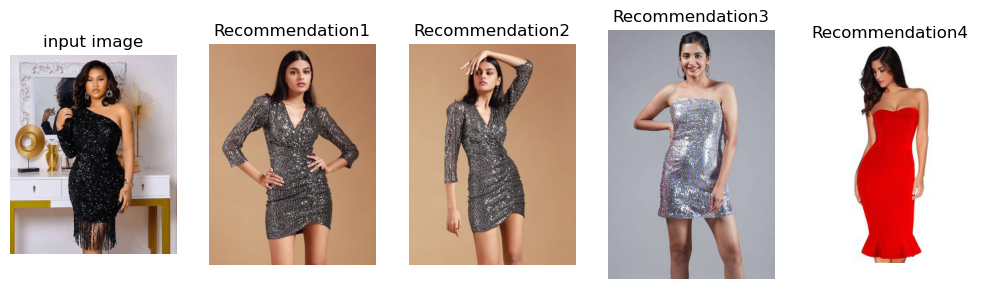

In [9]:
# Let's find out similar images 
input_image_path = r"C:\Users\thars\Downloads\women_fashion\women fashion\one-shoulder, black, sequined dress with fringe detailing at the hem.jpg"
recommend_fashoin_items_cnn(input_image_path, all_features, image_path_list, model, top_n=5)